In [1]:
using Plots
function old_pick_colors(grad,n)
    grad=colorscheme(grad)
    RGB[getColorZ(grad,z) for z in Plots.getpctrange(n)]
end

INFO: Recompiling stale cache file /home/tom/.julia/lib/v0.4/Colors.ji for module Colors.
INFO: Recompiling stale cache file /home/tom/.julia/lib/v0.4/Plots.ji for module Plots.


old_pick_colors (generic function with 1 method)

In [2]:
# without specifying the background color, you get colors that are hard to see
cols = distinguishable_colors(20)[2:end]

In [2]:
# without specifying the background color, you get colors that are hard to see
cols = distinguishable_colors(20)[2:end]

In [3]:
# before the RGB conversion
cols = distinguishable_colors(20,colorant"white")[2:end]

In [3]:
# after the RGB conversion
cols = distinguishable_colors(20,colorant"white")[2:end]

In [4]:
# this is the default gradient used as the base for color picking now
rainbow = colorscheme(:darkrainbow)
RGB[getColorZ(rainbow,z) for z in linspace(0,1,100)]

In [5]:
# try out a new gradient
new_colorgradient = colorscheme([colorant"darkblue", colorant"blueviolet",  colorant"darkcyan",colorant"green",
    Plots.darken(colorant"yellow",0.3), colorant"orange", Plots.darken(colorant"red",0.2)])
        #[0, 0.15, 0.3, 0.45, 0.7, 1.0]) # add z-values for each color to make gradient non-linear
RGB[getColorZ(new_colorgradient,z) for z in linspace(0,1,100)]

In [6]:
# a different method to choose from the gradient
function new_get_zvalues(n::Int)
    offsets = Plots.getpctrange(ceil(Int,n/4)+1)/4
    offsets = vcat(offsets[1], offsets[3:end])
    zvalues = Float64[]
    for offset in offsets
        append!(zvalues, offset + [0.0, 0.5, 0.25, 0.75])
    end
    vcat(zvalues[1], 1.0, zvalues[2:n-1])
end

# and a method to display the colors we will choose
function new_pick_colors(grad,n)
    grad=colorscheme(grad)
    RGB[getColorZ(grad,z) for z in new_get_zvalues(n)]
end

new_pick_colors (generic function with 1 method)

In [19]:
# old gradient with old color picker
# better (IMO) than the distinguishable_colors... first 5 colors are good, but then it gets worse
# NOTE: this is the current default palette
oldgrad_oldcolors = old_pick_colors(:darkrainbow,20)

In [30]:
# new gradient with old color picker... darker, with less blue
newgrad_oldcolors = old_pick_colors(new_colorgradient, 20)

In [31]:
# old gradient with new color picker... colors are the same but ordering is different... better randomization
oldgrad_newcolors = new_pick_colors(rainbow, 20)

In [32]:
# new gradient with new color picker
newgrad_newcolors = new_pick_colors(new_colorgradient, 20)

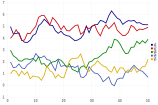

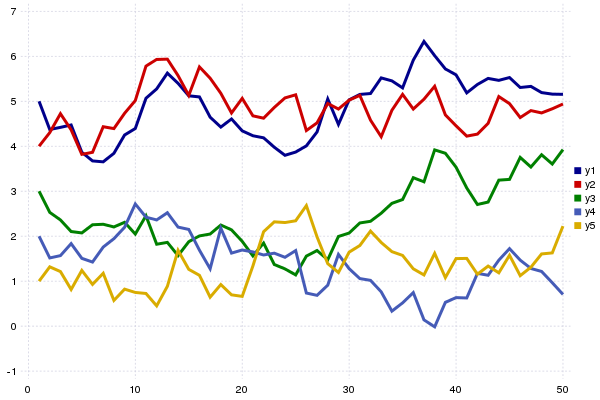

In [33]:
# plot a few colors (it's important that these look ok)
gadfly()
default(size=(600,400))
plot(Plots.fakedata(50,5)/3 .+ reverse(1:5)', l=(3, newgrad_newcolors'))

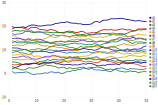

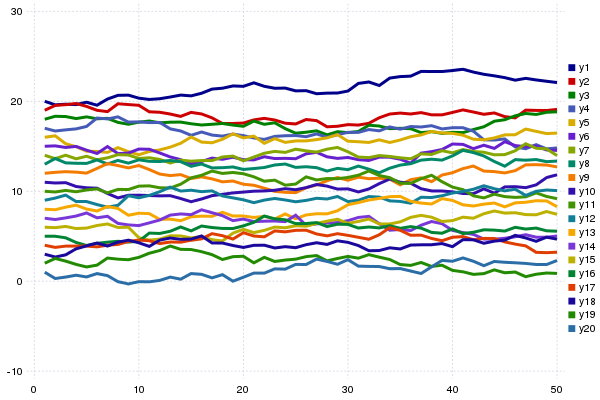

In [34]:
# plot many colors (no hue should dominate your attention)
plot(Plots.fakedata(50,20)/3 .+ reverse(1:20)', l=(3, newgrad_newcolors'))

In [35]:
# notice that we have unlimited unique colors this way
colors = new_pick_colors(new_colorgradient, 1000)
length(unique(colors))

1000

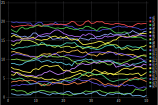

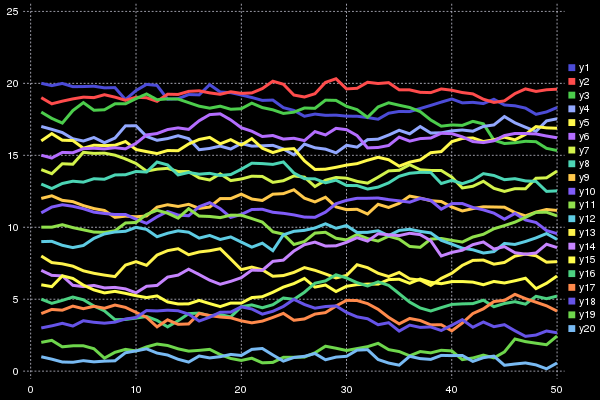

In [36]:
# here's how we might adjust for a dark background
lightcolors = map(c->Plots.lighten(c,0.3), newgrad_newcolors')
plot(Plots.fakedata(50,20)/3 .+ reverse(1:20)', l=(3, lightcolors), bg=:black)

In [52]:
# and could consider other palettes for backgrounds with a certain hue, for example orange background:
orangebg_colorgradient = colorscheme([colorant"darkslateblue", colorant"violet", 
    colorant"lightgreen", colorant"darkcyan",colorant"mediumturquoise", colorant"mediumvioletred"])
RGB[getColorZ(orangebg_colorgradient,z) for z in linspace(0,1,100)]

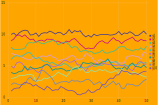

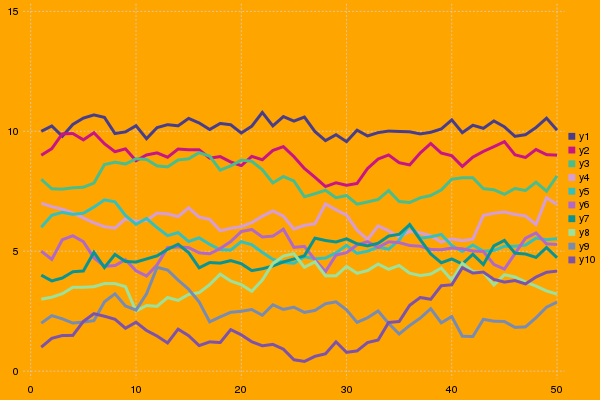

In [53]:
plot(Plots.fakedata(50,10)/3 .+ reverse(1:10)', l=(3, new_pick_colors(orangebg_colorgradient,20)'), bg=:orange)

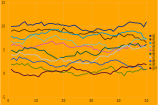

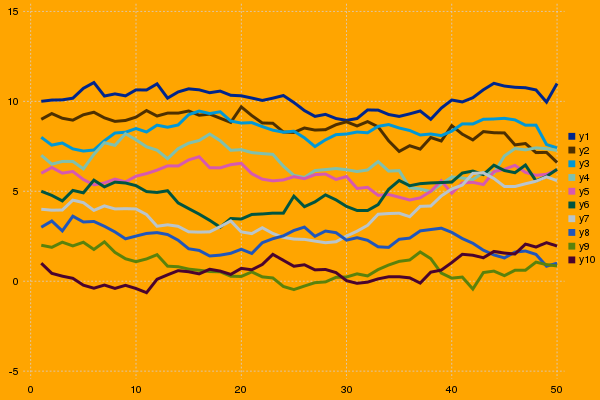

In [54]:
# or just use distinguishable colors when the background isn't a shade of gray
cols = distinguishable_colors(20,colorant"orange")[2:end]
plot(Plots.fakedata(50,10)/3 .+ reverse(1:10)', l=(3, new_pick_colors(cols,20)'), bg=:orange)

In [1]:
# playing around with distinguishable_colors
using Colors

# this is what gadfly does:
distinguishable_colors(20, [LCHab(70, 60, 240)],
    transform=c -> deuteranopic(c, 0.5),
    lchoices=Float64[65, 70, 75, 80],
    cchoices=Float64[0, 50, 60, 70],
    hchoices=linspace(0, 330, 24))

In [38]:
bgcolor = colorant"red"
color_bases = [colorant"steelblue", colorant"indianred"]
lightness = 60
function adjust_lightness(c, l)
    lch = LCHab(c)
    RGB(LCHab(l, lch.c, lch.h))
end

seed_colors = vcat(bgcolor, map(c -> adjust_lightness(c,lightness), color_bases))
distinguishable_colors(20, seed_colors,
#     transform=c -> deuteranopic(c, 0.5),
    lchoices=Float64[lightness],
    cchoices=Float64[50],
    hchoices=linspace(0, 340, 20))[2:end]

In [107]:
distinguishable_colors(21, colorant"black", transform=c -> deuteranopic(c, 0.5),
    lchoices=Float64[65, 70, 75, 80],
    cchoices=Float64[0, 50, 60, 70],
    hchoices=linspace(0, 330, 24))[2:end]

In [108]:
dcols = reverse(distinguishable_colors(21, colorant"white", 
    #transform=c -> deuteranopic(c, 0.5),
    lchoices=Float64[60],
    cchoices=Float64[100],
    hchoices=linspace(100, 430, 30)
)[2:end])

In [53]:
# try out a new gradient
using Plots
mlcols = colorscheme([
    RGB( 0,    0.4470,    0.7410),
    RGB(0.4940,    0.1840,    0.5560),
    RGB(0.9290,    0.6940,    0.1250),
    RGB(0.4660,    0.6740,    0.1880),
    RGB(0.3010,    0.7450,    0.9330),
    RGB(0.6350,    0.0780,    0.1840),
    RGB(0.8500,    0.3250,    0.0980),
    ])
        #[0, 0.15, 0.3, 0.45, 0.7, 1.0]) # add z-values for each color to make gradient non-linear
RGB[getColorZ(mlcols,z) for z in linspace(0,1,100)]

In [54]:
RGB[getColorZ(mlcols,z) for z in Plots.get_zvalues(20)]

In [109]:
RGB[getColorZ(colorscheme(dcols),z) for z in Plots.get_zvalues(20)]

LoadError: LoadError: UndefVarError: new_pick_colors not defined
while loading In[102], in expression starting on line 1

In [70]:
using Plots
function adjust_lch(color, l, c)
    lch = LCHab(color)
    convert(RGB, LCHab(l, c, lch.h))
end

function lightness_from_background(bgcolor)
  bglight = LCHab(bgcolor).l
  0.45bglight + 55.0 * (bglight < 50.0)
end

function gradient_from_list(cs)
    zvalues = Plots.get_zvalues(length(cs))
    indices = sortperm(zvalues)
    sorted_colors = map(RGB, cs[indices])
    sorted_zvalues = zvalues[indices]
    ColorGradient(sorted_colors, sorted_zvalues)
end

function generate_palette(bgcolor = colorant"white";
                         color_bases = [colorant"steelblue", colorant"indianred"],
                         lightness = lightness_from_background(bgcolor),
                         n = 20)
    seed_colors = map(c -> adjust_lch(c,lightness,50), vcat(bgcolor, color_bases))
    colors = distinguishable_colors(20,
          seed_colors,
          lchoices=Float64[lightness],
          cchoices=Float64[50],
          hchoices=linspace(0, 340, 20)
        )[2:end]
    gradient_from_list(colors)
end

function show_gradient(grad)
    display(RGB[getColorZ(grad,z) for z in linspace(0,1,1000)])
end

function show_palette(grad)
    display(RGB[getColorZ(grad,z) for z in Plots.get_zvalues(20)])
end

function generate_palette_and_show(bgcolor, n=9)
    grad = generate_palette(bgcolor, n=9)
#     show_gradient(grad)
    show_palette(grad)
end

generate_palette_and_show (generic function with 2 methods)

In [71]:
generate_palette_and_show(colorant"white");

In [73]:
generate_palette_and_show(colorant"orange");

In [72]:
generate_palette_and_show(colorant"black");

In [74]:
generate_palette_and_show(colorant"darkgreen");

In [65]:
using Plots; default(size=(600,200))
data = Plots.fakedata(50,10);

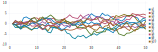

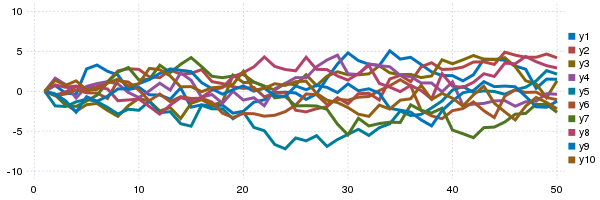

In [66]:
bgcolor = colorant"white"
plot(data, w=3, bg=bgcolor, palette = generate_palette(bgcolor))

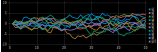

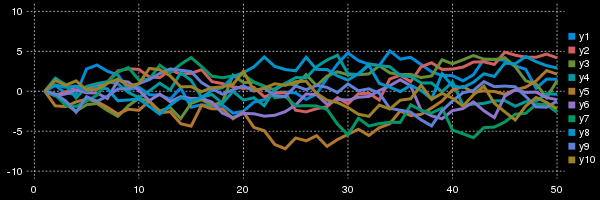

In [67]:
bgcolor = colorant"black"
plot(data, w=3, bg=bgcolor, palette = generate_palette(bgcolor))

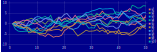

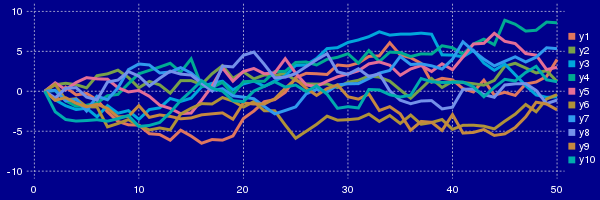

In [68]:
bgcolor = colorant"darkblue"
plot(Plots.fakedata(50,10), w=3, bg=bgcolor, palette = generate_palette(bgcolor, color_bases=[colorant"red"]))

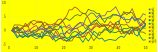

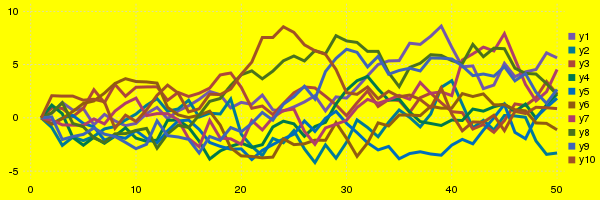

In [69]:
bgcolor = colorant"yellow"
plot(Plots.fakedata(50,10), w=3, bg=bgcolor, palette = generate_palette(bgcolor, color_bases=[colorant"blue"]))